In [ ]:
pip install tensorflow keras matplotlib numpy opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 357.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 MB 3.4 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.3/263.3 kB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 5.8 MB/s eta 0

In [ ]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2024-07-23 14:48:56.988558: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
import os
import csv

def create_labels(image_folder, label):
    # Check if the file is empty to write header
    file_exists = os.path.isfile('labels.csv')
    
    with open('labels.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        
        # Write the header if the file is empty
        if not file_exists or os.path.getsize('labels.csv') == 0:
            writer.writerow(['image', 'label'])
        
        for filename in os.listdir(image_folder):
            if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                writer.writerow([filename, label])

# Paths to your image folders
solar_farm_folder = '/Users/macbookpro/Desktop/SolarProject/SolarFarm_Images'
non_solar_farm_folder = '/Users/macbookpro/Desktop/SolarProject/Non_SolarFarms'

# Create labels
create_labels(solar_farm_folder, 1)  # Label 1 for solar farms
create_labels(non_solar_farm_folder, 0)  # Label 0 for non-solar farms


In [4]:
base_dir = '/Users/macbookpro/Desktop/SolarProject/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create directories if they don't exist
os.makedirs(os.path.join(train_dir, 'solar_farm'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'non_solar_farm'), exist_ok=True)
os.makedirs(os.path.join(validation_dir, 'solar_farm'), exist_ok=True)
os.makedirs(os.path.join(validation_dir, 'non_solar_farm'), exist_ok=True)


In [20]:
df = pd.read_csv('labels.csv')
# Define function to split images into train and validation
# Paths to your image folders
solar_farm_folder = '/Users/macbookpro/Desktop/SolarProject/SolarFarm_Images'
non_solar_farm_folder = '/Users/macbookpro/Desktop/SolarProject/Non_SolarFarms'
def split_and_copy_images(df, img_folder, output_train_folder, output_validation_folder, test_size=0.2):
    # Split dataframe
    train_df, val_df = train_test_split(df, test_size=test_size, stratify=df['label'])
    
    # Copy images to respective directories
    for index, row in train_df.iterrows():
        src_path = os.path.join(img_folder, row['image'])
        # dest_path = os.path.join(output_train_folder, 'solar_farm' if row['label'] == 1 else 'non_solar_farm', row['image'])
        dest_path = output_train_folder
        shutil.copy(src_path, dest_path)
    
    for index, row in val_df.iterrows():
        src_path = os.path.join(img_folder, row['image'])
        #dest_path = os.path.join(output_validation_folder, 'solar_farm' if row['label'] == 1 else 'non_solar_farm', row['image'])
        dest_path = output_validation_folder
        shutil.copy(src_path, dest_path)

# Split and copy images
split_and_copy_images(df[df['label'] == 1], solar_farm_folder, os.path.join(train_dir, 'solar_farm'), os.path.join(validation_dir, 'solar_farm'))
split_and_copy_images(df[df['label'] == 0], non_solar_farm_folder, os.path.join(train_dir, 'non_solar_farm'), os.path.join(validation_dir, 'non_solar_farm'))

In [21]:
image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 83 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [28]:
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

model = create_cnn_model()

In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3854 - loss: 0.8283 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 2/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.4211 - loss: 0.7102

2024-07-23 15:39:19.695112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4211 - loss: 0.7102 - val_accuracy: 0.5000 - val_loss: 0.6890
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5284 - loss: 0.6897 - val_accuracy: 0.5000 - val_loss: 0.6764
Epoch 4/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.4688 - loss: 0.6879

2024-07-23 15:39:23.734384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step - accuracy: 0.4688 - loss: 0.6879 - val_accuracy: 0.5000 - val_loss: 0.6639
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.4896 - loss: 0.6768 - val_accuracy: 0.5000 - val_loss: 0.6192
Epoch 6/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.5789 - loss: 0.6486

2024-07-23 15:39:27.924490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - accuracy: 0.5789 - loss: 0.6486 - val_accuracy: 0.7727 - val_loss: 0.5798
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6579 - loss: 0.6785 - val_accuracy: 0.7727 - val_loss: 0.5690
Epoch 8/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.7812 - loss: 0.6308

2024-07-23 15:39:31.958360: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7812 - loss: 0.6308 - val_accuracy: 0.7273 - val_loss: 0.5948
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4126 - loss: 0.6961 - val_accuracy: 0.6818 - val_loss: 0.6438
Epoch 10/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.5625 - loss: 0.6774

2024-07-23 15:39:36.377159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5625 - loss: 0.6774 - val_accuracy: 0.6818 - val_loss: 0.6367
Epoch 11/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5065 - loss: 0.6940 - val_accuracy: 0.6818 - val_loss: 0.5819
Epoch 12/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.5312 - loss: 0.6507

2024-07-23 15:39:40.516671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5312 - loss: 0.6507 - val_accuracy: 0.7273 - val_loss: 0.5636
Epoch 13/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7075 - loss: 0.6101 - val_accuracy: 0.5000 - val_loss: 0.7300
Epoch 14/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.4062 - loss: 0.8369

2024-07-23 15:39:44.561358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step - accuracy: 0.4062 - loss: 0.8369 - val_accuracy: 0.5455 - val_loss: 0.5890
Epoch 15/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6562 - loss: 0.6482 - val_accuracy: 0.8182 - val_loss: 0.5852


In [30]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step - accuracy: 0.8182 - loss: 0.5852
Test accuracy: 0.8181818127632141


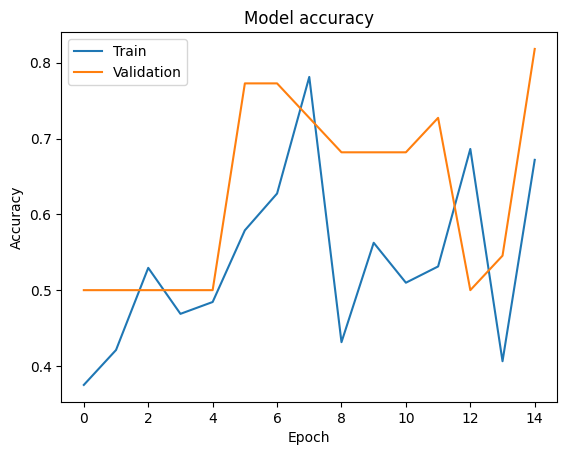

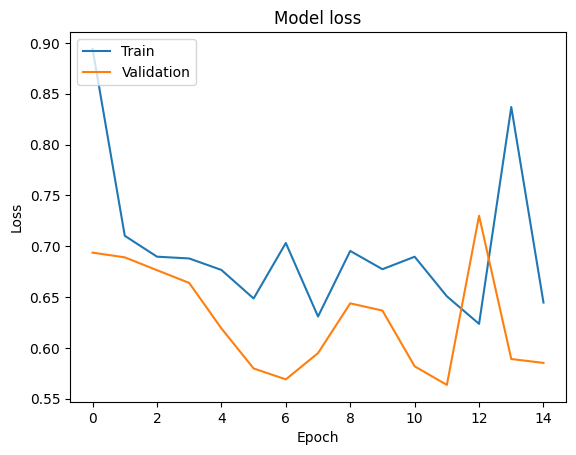

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
                precision    recall  f1-score   support

Non-Solar Farm       0.53      0.73      0.62        11
    Solar Farm       0.57      0.36      0.44        11

      accuracy                           0.55        22
     macro avg       0.55      0.55      0.53        22
  weighted avg       0.55      0.55      0.53        22



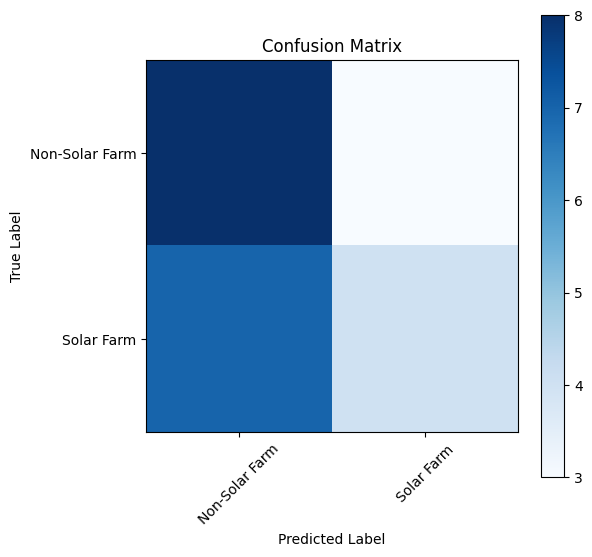

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred)  # Convert probabilities to binary predictions

# Get true labels
y_true = validation_generator.classes

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Non-Solar Farm', 'Solar Farm']))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Solar Farm', 'Solar Farm'], rotation=45)
plt.yticks(tick_marks, ['Non-Solar Farm', 'Solar Farm'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()